In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **FETCHING TOP 8000 DATA **

In [14]:
import sqlite3
import pandas as pd

db=sqlite3.connect('amazon_sliced_data2.sqlite')
main_data=pd.read_sql_query("""SELECT * FROM top8kpoints""",db)
db.close

main_data.shape

(8001, 13)

**TSNE FOR TOP 2K ENTRIES**


# TSNE FOR BAG OF WORDS

In [15]:
#BOW

from sklearn.feature_extraction.text import CountVectorizer
#TEXT ANALYSIS ALGORITHM
#BAG OF WORDS
vectorizer=CountVectorizer()
BOW=vectorizer.fit_transform(main_data["CleanedReview"].values)

print("SPARSE MATRIX TYPE",type(BOW))
print("Shape",BOW.get_shape())
print("Number of unique words",BOW.shape[1])



SPARSE MATRIX TYPE <class 'scipy.sparse.csr.csr_matrix'>
Shape (8001, 11674)
Number of unique words 11674


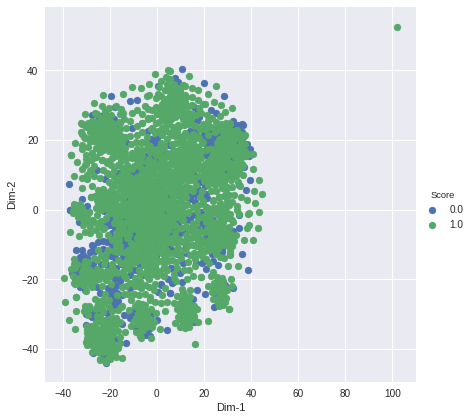

In [16]:
#TSNE FOR BOW
from sklearn.manifold import TSNE
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


x=BOW[:2000,:]
x=x.todense()

model=TSNE(n_components=2,random_state=0)

BOW_TSNE=model.fit_transform(x)

BOW_TSNE=np.vstack((BOW_TSNE.T,main_data.Score[:2000])).T
BOW_DF=pd.DataFrame(data=BOW_TSNE,columns=["Dim-1","Dim-2","Score"])

sn.FacetGrid(BOW_DF, hue="Score", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()

**TSNE FOR BAG OF WORDS WITH CHANGED PERPLEXITY AND ITERATIONS**

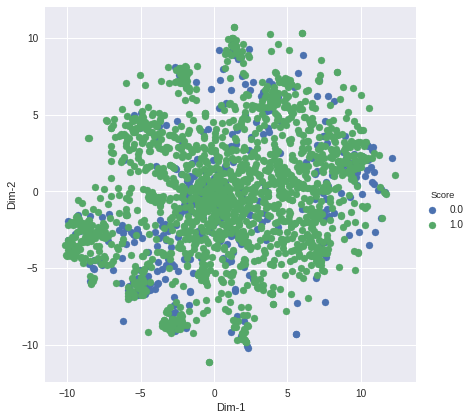

In [17]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

BOW_TSNE=model.fit_transform(x)

BOW_TSNE=np.vstack((BOW_TSNE.T,main_data.Score[:2000])).T
BOW_DF=pd.DataFrame(data=BOW_TSNE,columns=["Dim-1","Dim-2","Score"])

sn.FacetGrid(BOW_DF, hue="Score", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()

**OBSERVATIONS:**
1. THE PLOT IS SCATTERED AND THE POSITIVES REVIEWS DOMINATE
2. DIFFERENTIATION BETWEEN POSITIVE AND NEGATIVE REVIEWS IS NOT POSSIBLE
3. CHANGE IN PERPLEXITY DOES CHANGE THE PLOT BUT DOES HELP IN CLASSIFICATION








# **TSNE FOR TF**

In [19]:
#TFID 


from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2))
tf_idf_vectors=tf_idf_vectorizer.fit_transform(main_data['CleanedReview'].values)
print("Shape:",tf_idf_vectors.shape)
print("Type:",type(tf_idf_vectors))
print("The number of unique words:",tf_idf_vectors.shape[1])



Shape: (8001, 171071)
Type: <class 'scipy.sparse.csr.csr_matrix'>
The number of unique words: 171071


In [22]:
#TSNE FOR TFIDF

from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import StandardScaler

standardized_data=StandardScaler(with_mean=False).fit_transform(tf_idf_vectors)

svd = TruncatedSVD(n_components=50,random_state=42)
SVD_TFIDF=svd.fit_transform(standardized_data)
print(type(SVD_TFIDF))
print(SVD_TFIDF.shape)

<class 'numpy.ndarray'>
(8001, 50)


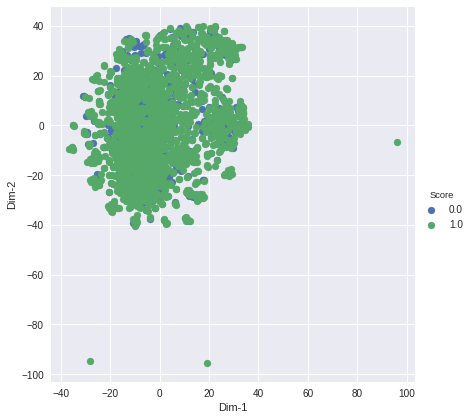

In [23]:
model=TSNE(n_components=2,random_state=0)

TFIDF_TSNE=model.fit_transform(SVD_TFIDF[:2000,:])

TFIDF_TSNE=np.vstack((TFIDF_TSNE.T,main_data.Score[:2000])).T
TFIDF_DF=pd.DataFrame(data=TFIDF_TSNE,columns=["Dim-1","Dim-2","Score"])

sn.FacetGrid(TFIDF_DF, hue="Score", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()

**TSNE FOR TF-IDF WITH CHANGED PERPLEXITY AND ITERATIONS**

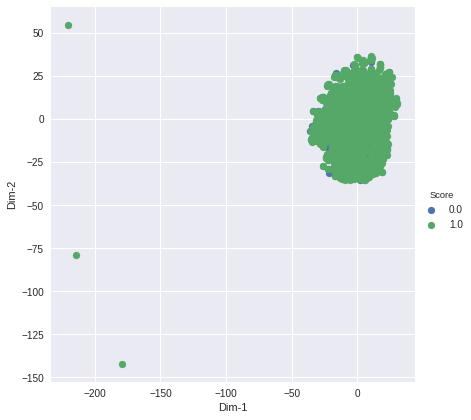

In [24]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

TFIDF_TSNE=model.fit_transform(SVD_TFIDF[:2000,:])

TFIDF_TSNE=np.vstack((TFIDF_TSNE.T,main_data.Score[:2000])).T
TFIDF_DF=pd.DataFrame(data=TFIDF_TSNE,columns=["Dim-1","Dim-2","Score"])

sn.FacetGrid(TFIDF_DF, hue="Score", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()

**OBSERVATIONS:**
1. THE PLOT IS VERY DENSE AND THE POSITIVES REVIEWS DOMINATE AND THERE ARE TRACS OF NEGATIVE REVIEWS
2. DIFFERENTIATION BETWEEN POSITIVE AND NEGATIVE REVIEWS IS NOT POSSIBLE
3. CHANGE IN PERPLEXITY DOES CHANGE THE PLOT BUT DOES HELP IN CLASSIFICATION

# **TSNE FOR WORD2VEC**

In [31]:
#WORD2VEC

from gensim.models import Word2Vec
from gensim.models import KeyedVectors


tokenized_sentences=[]
for sentence in main_data['CleanedReview'].values:
    tokenized_sentences.append(sentence.split())
print(tokenized_sentences[0])    

['alway', 'love', 'chicken', 'soup', 'rice', 'late', 'ethel', 'alway', 'made', 'homemad', 'chicken', 'chicken', 'soup', 'rice', 'book', 'take', 'back', 'day', 'mother', 'father', 'sister', 'went', 'ethel', 'hous', 'late', 'isador', 'would', 'cook', 'chicken', 'ethel', 'blind', 'remind', 'time', 'togeth', 'famili', 'bring', 'back', 'happi', 'memori', 'love', 'share', 'bowl', 'hot', 'soup']


In [32]:
w2v_model=Word2Vec(tokenized_sentences,min_count=5,size=50,workers=4)
w2v_words=list(w2v_model.wv.vocab)
print("Number of words that occured minimum 5 times",len(w2v_words))

print("sample words",w2v_words[0:50])

Number of words that occured minimum 5 times 3900
sample words ['alway', 'love', 'chicken', 'soup', 'rice', 'late', 'made', 'homemad', 'book', 'take', 'back', 'day', 'mother', 'father', 'sister', 'went', 'hous', 'would', 'cook', 'blind', 'remind', 'time', 'togeth', 'famili', 'bring', 'happi', 'memori', 'share', 'bowl', 'hot', 'grew', 'read', 'sendak', 'watch', 'realli', 'movi', 'incorpor', 'son', 'howev', 'miss', 'hard', 'cover', 'version', 'seem', 'kind', 'flimsi', 'two', 'hand', 'keep', 'page']


In [35]:
from tqdm import tqdm
#AVG WORD2VEC

#AVG W2V,TFIDF-W2V 
sentence_vec=[]
for sentence in tqdm(tokenized_sentences):
    sen_vec=np.zeros(50)
    counter=0
    for word in sentence:
        if word in w2v_words:
            vector=w2v_model.wv[word]
            sen_vec+=vector
            counter+=1
    if counter!=0:
        sen_vec/=counter
    sentence_vec.append(sen_vec)
print(len(sentence_vec))    

100%|██████████| 8001/8001 [00:07<00:00, 1141.30it/s]

8001


In [47]:
sentence_vec=np.array(sentence_vec)
sentence_vec.reshape(8001,50)
sentence_vec.shape

(8001, 50)

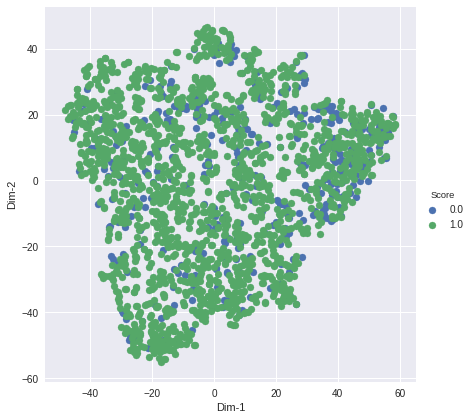

In [51]:
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import StandardScaler

AVG_WORD2VEC=StandardScaler(with_mean=False).fit_transform(sentence_vec)

model=TSNE(n_components=2,random_state=0)

AVGWORD2VEC_TSNE=model.fit_transform(AVG_WORD2VEC[:2000,:])

AVGWORD2VEC_TSNE=np.vstack((AVGWORD2VEC_TSNE.T,main_data.Score[:2000])).T
AVGWORD2VEC_DF=pd.DataFrame(data=AVGWORD2VEC_TSNE,columns=["Dim-1","Dim-2","Score"])

sn.FacetGrid(AVGWORD2VEC_DF, hue="Score", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()


**TSNE FOR WORD2VEC WITH CHANGED PERPLEXITY AND ITERATIONS**

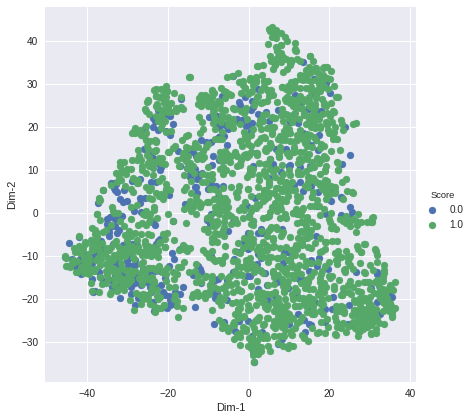

In [52]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

AVGWORD2VEC_TSNE=model.fit_transform(AVG_WORD2VEC[:2000,:])

AVGWORD2VEC_TSNE=np.vstack((AVGWORD2VEC_TSNE.T,main_data.Score[:2000])).T
AVGWORD2VEC_DF=pd.DataFrame(data=AVGWORD2VEC_TSNE,columns=["Dim-1","Dim-2","Score"])

sn.FacetGrid(AVGWORD2VEC_DF, hue="Score", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()


**OBSERVATIONS:**
1. THE PLOT IS SCATTERED AND THE POSITIVES REVIEWS DOMINATE
2. DIFFERENTIATION BETWEEN POSITIVE AND NEGATIVE REVIEWS IS NOT POSSIBLE
3. CHANGE IN PERPLEXITY DOES CHANGE THE PLOT BUT DOES HELP IN CLASSIFICATION
4. SIMILIAR WORD TEND TO FALL UNDER THE SAME REGION THATS WHY THE PLOTS ARE SCATTERED INTO SMALL CLUSTERS


# **TSNE FOR TF-IDF WORD2VEC**

In [0]:
tf_idf_model=TfidfVectorizer()
tf_idf_vector=tf_idf_model.fit_transform(main_data['CleanedReview'].values)

dictionary=dict(zip(tf_idf_model.get_feature_names(),list(tf_idf_model.idf_)))



In [54]:
tf_idf_feature=tf_idf_model.get_feature_names()
tf_idf_w2v=[]
for sentence in tqdm(tokenized_sentences):
    tfidf_sum=0
    sent_vec=np.zeros(50)
    for word in sentence:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            
            tf_idf=dictionary[word]*(sentence.count(word)/len(sentence))
            sent_vec+=vec*tf_idf
            tfidf_sum+=tf_idf
    if tfidf_sum!=0:
        sent_vec/=tfidf_sum
    tf_idf_w2v.append(sent_vec)
    

100%|██████████| 8001/8001 [00:09<00:00, 837.19it/s]


In [63]:
tf_idf_avg_vec=np.array(tf_idf_w2v)
tf_idf_avg_vec.reshape(8001,50)

array([[ 0.12564662, -0.10951407,  0.0937901 , ..., -0.19110976,
        -0.49093584,  0.36631016],
       [ 0.14775435, -0.12730879,  0.12876431, ..., -0.05487454,
        -0.33103691,  0.2478357 ],
       [ 0.1775771 , -0.14705305,  0.13096645, ..., -0.07288074,
        -0.44470574,  0.27689681],
       ...,
       [ 0.01409244, -0.11451251,  0.07051985, ..., -0.12587119,
        -0.43122205,  0.3429934 ],
       [ 0.12430532, -0.12414005,  0.12853652, ..., -0.06974933,
        -0.34640543,  0.21046805],
       [ 0.00425821, -0.11702821,  0.13823978, ..., -0.06535102,
        -0.43461759,  0.32366532]])

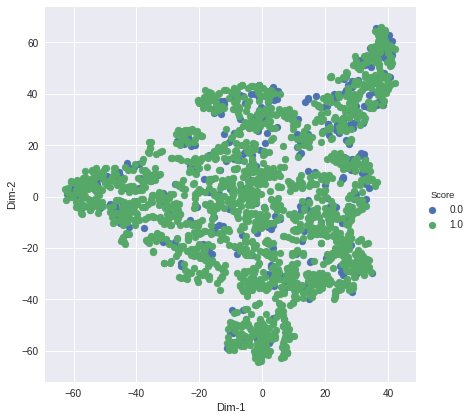

In [64]:
model=TSNE(n_components=2,random_state=0)

TFIDF_WORD2VEC_TSNE=model.fit_transform(tf_idf_avg_vec[:2000,:])

TFIDF_WORD2VEC_TSNE=np.vstack((TFIDF_WORD2VEC_TSNE.T,main_data.Score[:2000])).T
TFIDF_WORD2VEC_DF=pd.DataFrame(data=TFIDF_WORD2VEC_TSNE,columns=["Dim-1","Dim-2","Score"])

sn.FacetGrid(TFIDF_WORD2VEC_DF, hue="Score", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()

**TSNE FOR TF-IDF WORD2VEC WITH CHANGED PERPLEXITY AND ITERATIONS**

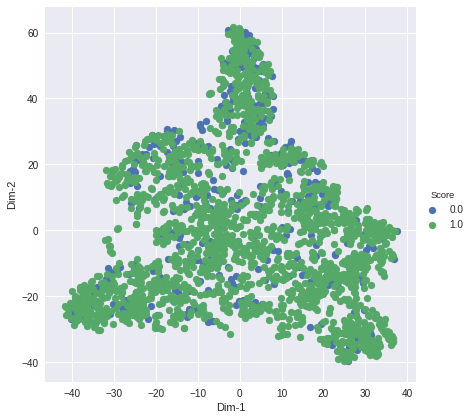

In [65]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

TFIDF_WORD2VEC_TSNE=model.fit_transform(tf_idf_avg_vec[:2000,:])

TFIDF_WORD2VEC_TSNE=np.vstack((TFIDF_WORD2VEC_TSNE.T,main_data.Score[:2000])).T
TFIDF_WORD2VEC_DF=pd.DataFrame(data=TFIDF_WORD2VEC_TSNE,columns=["Dim-1","Dim-2","Score"])

sn.FacetGrid(TFIDF_WORD2VEC_DF, hue="Score", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()

**OBSERVATIONS:**
1. THE PLOT IS SCATTERED AND THE POSITIVES REVIEWS DOMINATE
2. DIFFERENTIATION BETWEEN POSITIVE AND NEGATIVE REVIEWS IS NOT POSSIBLE
3. CHANGE IN PERPLEXITY DOES CHANGE THE PLOT BUT DOES HELP IN CLASSIFICATION


# **CONCLUSION**


1.   THE SEPARATION OF POINTS IS NOT POSSIBLE WITH ONLY 2K POINTS
2.   PERPLEXITY HAS NO INFLUENCE ON THE RESULTS SO MUCH
3.   NO BETTER RESULT CAN BE FOUND


